In [5]:
#To predict crop yield (tonnes per hectare) using climatic, agricultural input, and regional features with machine learning.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv("C:/Users/Tanvi/Downloads/archive (15)/Crop Yeild Data.csv")
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Avg_Temperature,Max_Temperature,Min_Temperature
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796,23.692,33.435,14.779
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710,23.692,33.435,14.779
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238,23.692,33.435,14.779
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.052,23.692,33.435,14.779
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.421,23.692,33.435,14.779


In [4]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
Avg_Temperature    0
Max_Temperature    0
Min_Temperature    0
dtype: int64

In [6]:
df.shape

(19689, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
 10  Avg_Temperature  19689 non-null  float64
 11  Max_Temperature  19689 non-null  float64
 12  Min_Temperature  19689 non-null  float64
dtypes: float64(8), int64(2), object(3)
memory usage: 2.0+ MB


In [9]:
x=df.drop("Yield",axis=1)
y=df["Yield"]

In [12]:
le=LabelEncoder()
for col in ["Crop","Season","State"]:
    x[col]=le.fit_transform(x[col])

In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(X_test)

In [17]:
print("Linear Regression R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2: 0.40220821044869515
MAE: 143.7416768525857
RMSE: 692.0799118905146


In [20]:
#Randomforest
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred_rf=rf.predict(X_test)

In [22]:
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R2: 0.9015978016464755
MAE: 11.801225319959364
RMSE: 280.79131531373866


In [24]:
feature_importance = pd.Series(
    rf.feature_importances_, index=x.columns
).sort_values(ascending=False)

feature_importance

Production         0.712590
Area               0.079598
Pesticide          0.052441
Crop               0.029947
Fertilizer         0.029577
State              0.023336
Min_Temperature    0.023313
Avg_Temperature    0.019557
Max_Temperature    0.014978
Annual_Rainfall    0.008025
Crop_Year          0.005168
Season             0.001469
dtype: float64

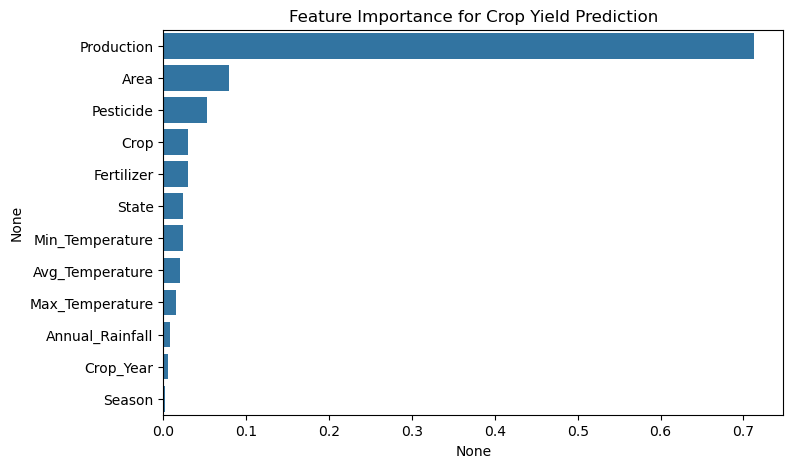

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance for Crop Yield Prediction")
plt.show()

In [32]:
df[df["Crop_Year"]==1997]["Min_Temperature"].min()

-15.017

In [33]:
df.groupby("Season")["Annual_Rainfall"].mean().sort_values(ascending=False)

Season
Winter         1724.912712
Autumn         1698.492478
Whole Year     1635.401425
Rabi           1388.150039
Kharif         1374.921026
Summer         1310.376921
Name: Annual_Rainfall, dtype: float64

In [34]:
df.groupby("Crop")["Annual_Rainfall"].mean().sort_values(ascending=False)

Crop
Black pepper             2142.858627
Arecanut                 2111.847599
Oilseeds total           1965.103448
Cashewnut                1939.702769
Tapioca                  1924.487299
Jute                     1918.231348
Coconut                  1793.241314
Mesta                    1766.284376
Banana                   1718.129735
Cardamom                 1702.725486
Rice                     1668.577147
Turmeric                 1630.723875
Other  Rabi pulses       1609.187777
Ginger                   1607.169935
Soyabean                 1605.828885
Sweet potato             1600.957520
Cowpea(Lobia)            1578.699373
Sugarcane                1560.093970
Other Kharif pulses      1526.549584
Tobacco                  1521.676058
Small millets            1511.673942
other oilseeds           1493.375365
Potato                   1485.874175
Rapeseed &Mustard        1473.844241
Wheat                    1451.315314
Cotton(lint)             1448.085454
Dry chillies             1433.334